In [1]:
from DeepImageSearch import Load_Data, Search_Setup

In [2]:
import pandas as pd

In [39]:
import requests

In [ ]:
import urllib.request
from PIL import Image

# Load data

In [15]:
df1 = pd.read_csv("water bottle data.csv")

In [17]:
len(df1)

84

In [16]:
df2 = pd.read_csv("dumbell data.csv")

In [18]:
len(df2)

84

In [17]:
df = pd.concat([df1, df2], ignore_index=True)

In [34]:
df[80:90]

,title,price,image
80,2 Pc Wide Mouth Sports Water Bottle Flip Top L...,$14.99,https://i.ebayimg.com/thumbs/images/g/6fwAAOSw...
81,New Listing64 OZ Insulated Water Bottle with S...,$29.99,https://i.ebayimg.com/thumbs/images/g/jucAAOSw...
82,"Steel Zeus Water Bottle 101 fl oz, Green",$29.98,https://i.ebayimg.com/thumbs/images/g/jbMAAOSw...
83,Drinco 32 oz 22 oz Insulated Stainless Steel W...,$22.95 to $23.99,https://i.ebayimg.com/thumbs/images/g/3zAAAOSw...
84,Shop on eBay,$20.00,https://ir.ebaystatic.com/rs/v/fxxj3ttftm5ltcq...
85,POWERT Rubber Coated Hex Dumbbell Hand Weight ...,$39.99 to $119.99,https://i.ebayimg.com/thumbs/images/g/d-8AAOSw...
86,Adjustable 110lb Weight Dumbbell Set Home Body...,$157.00,https://i.ebayimg.com/thumbs/images/g/C3cAAOSw...
87,"CAP Barbell, 15lb Coated Rubber Hex Dumbbell, ...",$26.70,https://i.ebayimg.com/thumbs/images/g/y1gAAOSw...
88,New ListingBalanceFrom Anti-Roll Rubber Encase...,$15.28,https://i.ebayimg.com/thumbs/images/g/7mgAAOSw...
89,"CAP Barbell Rubber-Coated Hex Dumbbells, Set of 2",$19.50 to $127.24,https://i.ebayimg.com/thumbs/images/g/SIwAAOSw...


#### Save images into a folder

In [46]:
imgList = {}

In [53]:
for i in range(len(df)):
    img_url = df["image"][i]
    img = Image.open(requests.get(img_url, stream = True).raw)
    img.save(f'images2\\ebay{i}.png')
    imgList[f'images2\\ebay{i}.png'] = i

# Read and train images

In [3]:
dl = Load_Data()

In [42]:
image_list = dl.from_folder(["images2"])

In [43]:
image_list[:5]

['images2\\ebay0.png',
 'images2\\ebay1.png',
 'images2\\ebay10.png',
 'images2\\ebay100.png',
 'images2\\ebay101.png']

In [44]:
setup = Search_Setup(image_list, pretrained=True, image_count = None)

 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


In [45]:
setup.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no
yes


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [02:15<00:00,  1.24it/s]

 Image Meta Information Saved: [metadata-files/vgg19/image_data_features.pkl]
 Saved The Indexed File:[metadata-files/vgg19/image_features_vectors.idx]


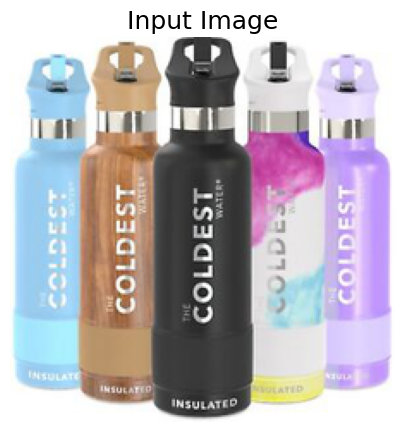

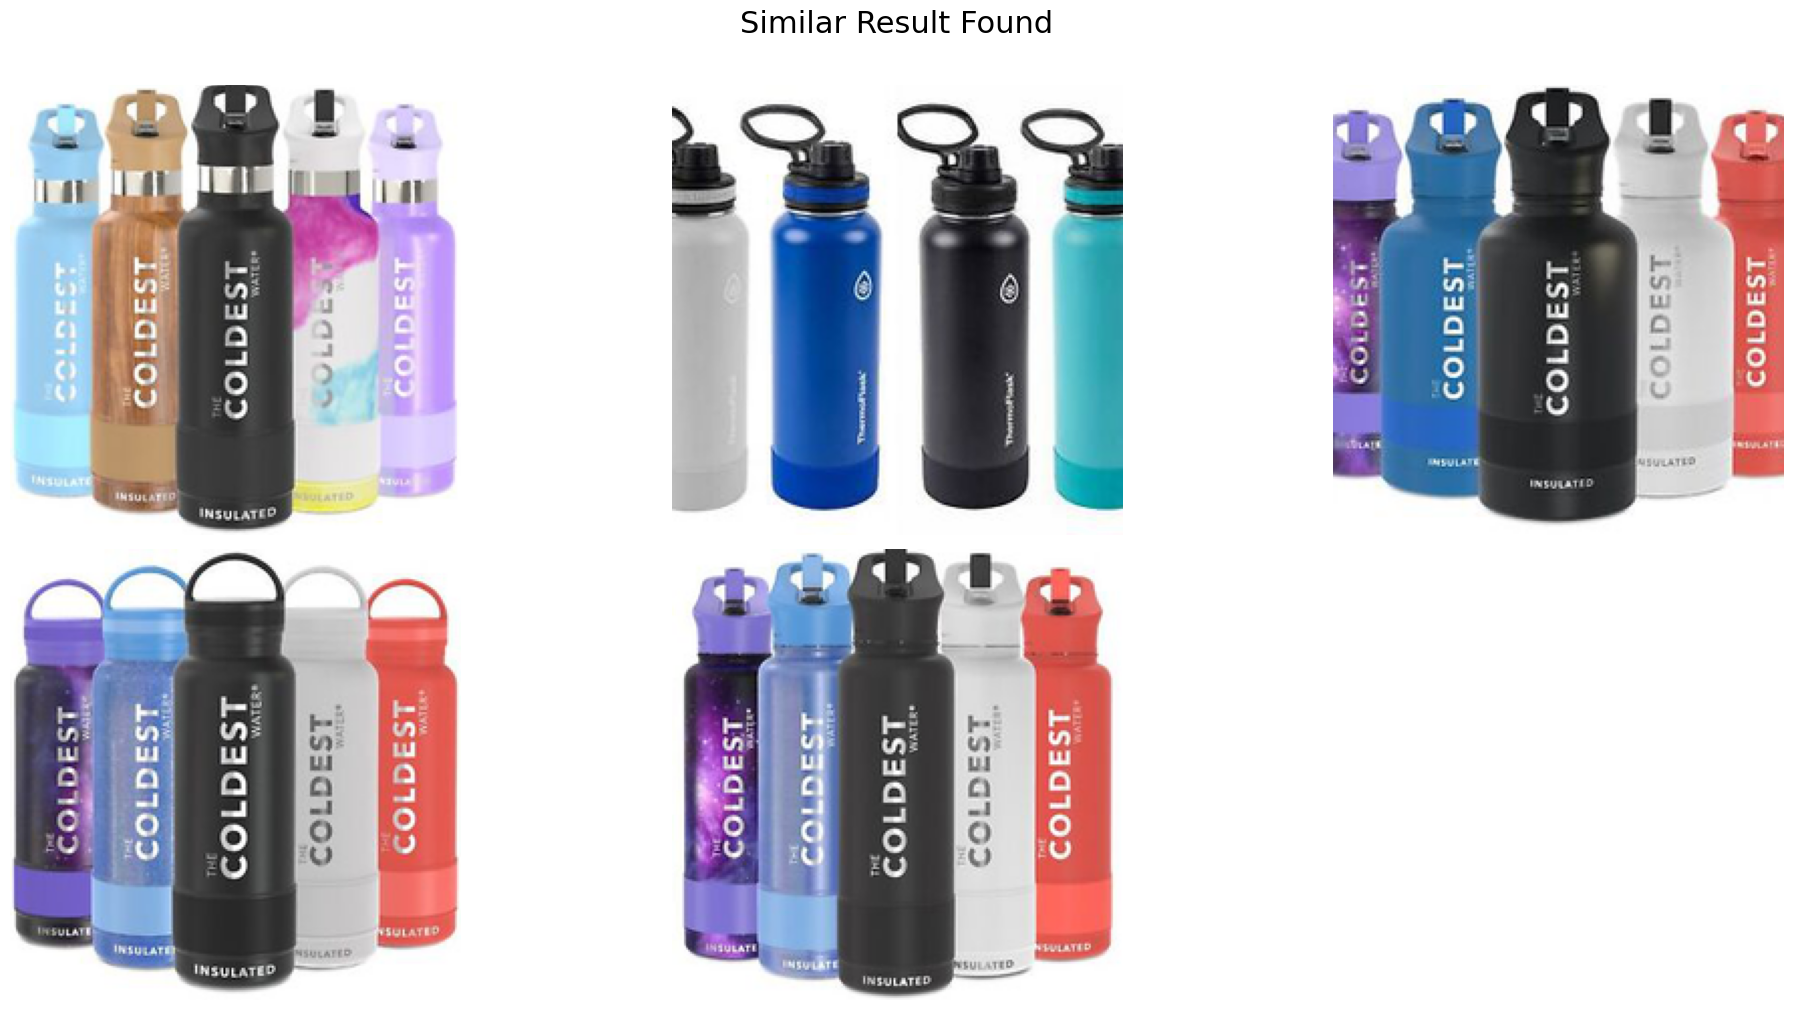

In [48]:
setup.plot_similar_images(image_path=image_list[1], number_of_images=5)

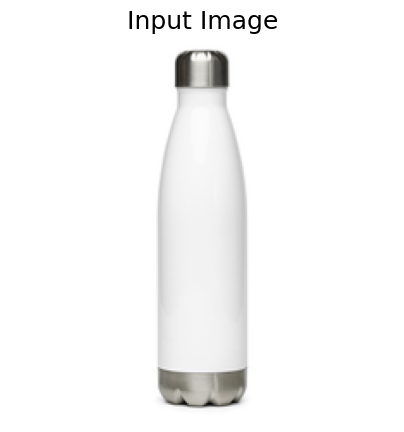

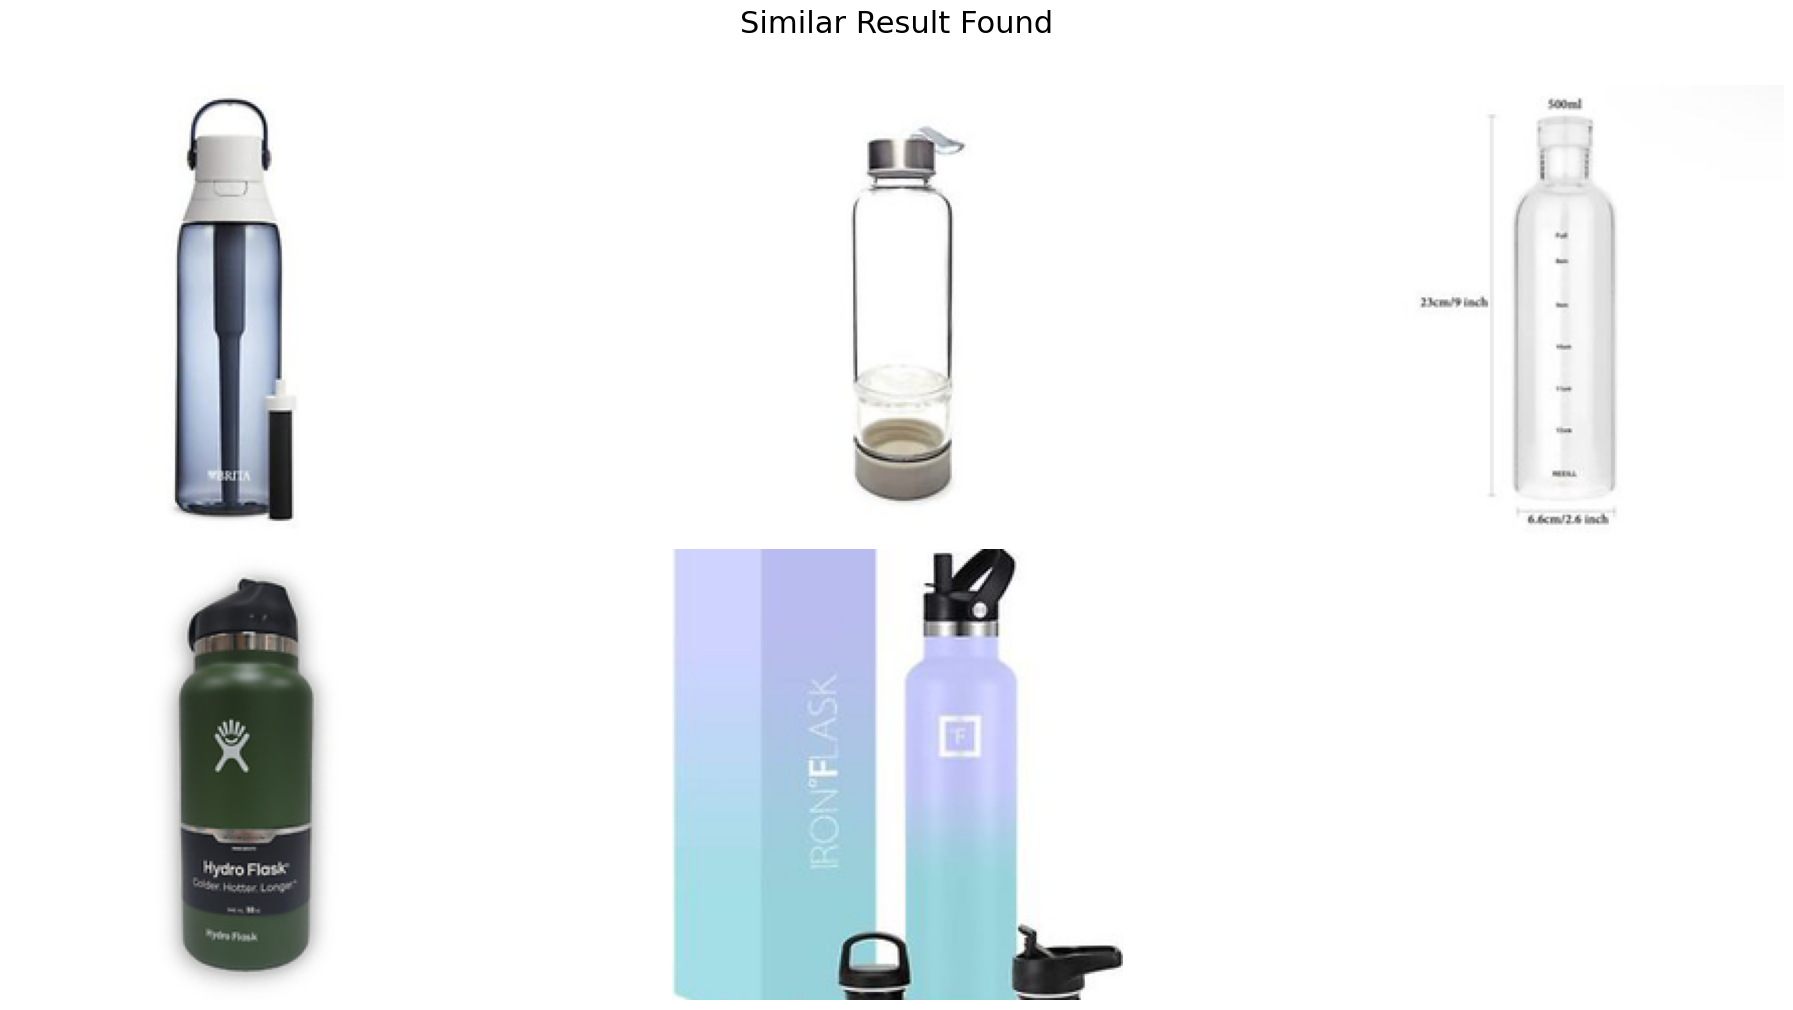

In [64]:
setup.plot_similar_images(image_path="stainless-steel-water-bottle-white-17oz-back-62b531bb9de07.jpg", number_of_images=5)

In [49]:
similar = setup.get_similar_images(image_path="stainless-steel-water-bottle-white-17oz-back-62b531bb9de07.jpg", number_of_images=1)

In [56]:
similar

{121: 'images2\\ebay57.png'}

# Get the price

In [61]:
index = imgList[list(similar.values())[0]]
df.loc[index]

title    Brita Premium Leak Proof Filtered Water Bottle...
price                                               $12.98
image    https://i.ebayimg.com/thumbs/images/g/Iq8AAOSw...
Name: 57, dtype: object

In [63]:
price = df.loc[index]["price"]
price

'$12.98'